# DAT565/DIT407 Assignment 6

Author: Group 26 | Wenjun Tian wenjunt@chalmers.se | Yifan Tang yifant@chalmers.se

Date: 2024-12-14

# Problem 1: The dataset
We load both training and test set using the `torchvision.datasets`
module, and then use the `transform` option to convert the images from `PIL` into `tensors` (and normalize the grey values to $[0,1]$)

The images from both sets and the verification of their dimensions and grey value normaliztion are shown below.

Verifiy image dimensions and value normalization:
Image size: 28 x 28
Min pixel grey value: 0.0
Max pixel grey value: 1.0


Here are 4 imags from the trainning set (line 1) and 4 images from the test set (line2)


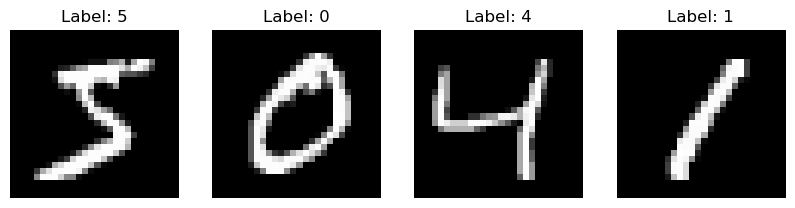

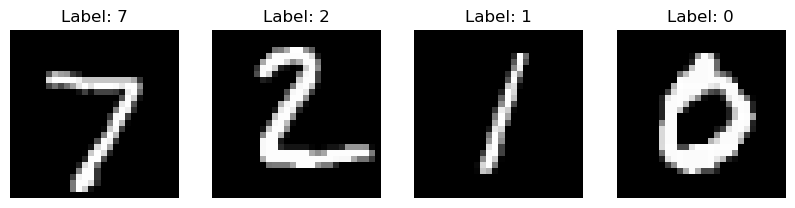

In [19]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.optim as optim
from torchvision.transforms import ToTensor
from torchvision import transforms
import matplotlib.pyplot as plt

# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    #convert PIL image to Tensors; normalize grey values to [0,1]
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Get data iterators from loaders
train_dataiter = iter(train_dataloader)
train_images, train_labels = next(train_dataiter)
test_dataiter = iter(test_dataloader)
test_images, test_labels = next(test_dataiter)

print("Verifiy image dimensions and value normalization:")
# Verify image dimensions
print(f"Image size: {train_images.shape[2]} x {train_images.shape[3]}")
# Verify grey values normaliztion
print(f"Min pixel grey value: {train_images.min()}")
print(f"Max pixel grey value: {train_images.max()}")
print("\n")

# Use matplotlib to plot 4 images from each set in greyscale

print("Here are 4 imags from the trainning set (line 1) and 4 images from the test set (line2)")

fig, axes = plt.subplots(1, 4, figsize=(10, 2.5))
for i in range(4):
    image = train_images[i].numpy().squeeze()
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i].item()}')
    axes[i].axis('off')

fig, axes = plt.subplots(1, 4, figsize=(10, 2.5))
for i in range(4):
    image = test_images[i].numpy().squeeze()
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {test_labels[i].item()}')
    axes[i].axis('off')

plt.show()

# Problem 2: Single hidden layer

## 2.1 Relevant Parameters:
1. Network Architecture: One hidden layer with 128 neurons (suggestion from Google).
2. Activation Function: ReLU.
3. Loss Function: Cross Entropy Loss.
4. Optimizer: Stochastic Gradient Descent (SGD) with a learning rate of 0.01.
5. Batch Size: 64 (defined in the previous code cell).
6. Number of Epochs: 10.

## 2.2 Validation accuracy of the network

Results are shown below the code.

In [20]:
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to hidden layer
        self.relu = nn.ReLU()             # ReLU activation function
        self.fc2 = nn.Linear(128, 10)     # Hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input from a 28x28 matrix to a (28^2)x1 vector
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = FeedforwardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 10

def train_and_validate(model, criterion, optimizer, num_epochs):
    print("Validation accuracy of the network (with respect to the test set) after each epoch:")
    for epoch in range(num_epochs):
        # Train
        model.train()
        for images, labels in train_dataloader:
            # Set previous grads to 0 before the new round of back propagation
            optimizer.zero_grad()
            # Get outputs
            outputs = model(images)
            # Preform back propagation, record grads
            loss = criterion(outputs, labels)
            loss.backward()
            # Update weights/biases using the computed grads
            optimizer.step()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_dataloader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%')

train_and_validate(model=model, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs)

Validation accuracy of the network (with respect to the test set) after each epoch:
Epoch [1/10], Validation Accuracy: 86.12%
Epoch [2/10], Validation Accuracy: 89.25%
Epoch [3/10], Validation Accuracy: 90.30%
Epoch [4/10], Validation Accuracy: 90.97%
Epoch [5/10], Validation Accuracy: 91.57%
Epoch [6/10], Validation Accuracy: 92.03%
Epoch [7/10], Validation Accuracy: 92.25%
Epoch [8/10], Validation Accuracy: 92.61%
Epoch [9/10], Validation Accuracy: 92.92%
Epoch [10/10], Validation Accuracy: 93.14%


# Problem 3: Two hidden layers

The code and results are shown below.

In [ ]:
# Define the neural network
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500) 
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, 10)  

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the model, loss function, and optimizer
model = FeedforwardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=2e-4)
num_epochs = 60

train_and_validate(model=model, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs)

Validation accuracy of the network (with respect to the test set) after each epoch:
Epoch [1/60], Validation Accuracy: 81.94%
Epoch [2/60], Validation Accuracy: 88.48%
Epoch [3/60], Validation Accuracy: 90.08%
Epoch [4/60], Validation Accuracy: 91.23%
Epoch [5/60], Validation Accuracy: 91.92%
Epoch [6/60], Validation Accuracy: 92.54%
Epoch [7/60], Validation Accuracy: 93.15%
Epoch [8/60], Validation Accuracy: 93.48%
Epoch [9/60], Validation Accuracy: 93.86%
Epoch [10/60], Validation Accuracy: 94.08%
Epoch [11/60], Validation Accuracy: 94.30%
Epoch [12/60], Validation Accuracy: 94.63%
Epoch [13/60], Validation Accuracy: 94.91%
Epoch [14/60], Validation Accuracy: 95.12%
Epoch [15/60], Validation Accuracy: 95.39%
Epoch [16/60], Validation Accuracy: 95.50%
Epoch [17/60], Validation Accuracy: 95.62%
Epoch [18/60], Validation Accuracy: 95.83%
Epoch [19/60], Validation Accuracy: 96.02%
Epoch [20/60], Validation Accuracy: 96.19%
Epoch [21/60], Validation Accuracy: 96.27%
Epoch [22/60], Validat

# Problem 4: Convolutional neural network


In [23]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create the model, loss function, and optimizer
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=2e-4) 
num_epochs = 60

train_and_validate(model=model, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs)

Validation accuracy of the network (with respect to the test set) after each epoch:


KeyboardInterrupt: 